# Advertising Budgets-Sales Challenge

In this challenge, you'll explore a real-world dataset containing Sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.

- **TV**: Spend on TV Advertisements
- **Radio**: Spend on radio Advertisements
- **Newspaper**: Spend on newspaper Advertisements
- **Sales**: Sales revenue generated


The challenge is to explore the dataset to analyze and identify which media contribute to sales and to find a function that given input budgets for TV, radio and newspaper predicts the output sales.

1. Start by cleaning the data.
   R - Identify any null or missing data, and impute appropriate replacement values.
   R - Describe and identify statistical parameters for each column.

2. Determine the relationship between the advertising budgets and sales, and to build a predictive model that can estimate sales based on the given budgets for TV, radio, and newspaper.
   **Exploratory Data Analysis (EDA)**: 
   * Describe and visualize the data to understand the distribution and relationships between variables
   * Calculate and plot heatmap correlation and pairwise correlations
   **Feature Engineering**: 
   * Create any additional features that might help in the analysis. Will be explained later.
   * Splitting data into training and test datasets. 
   * Train_Set_Size need to be 90% and Test_Set_Size 10%.
3. Apply any machine learning algorithm on the dataset   
   * Load the algorithm
   * Instantiate and Fit the model to the training dataset
   * Prediction on the test set
   * Evaluate with 3 different metrics. 
4. Create a new feature called Area, and randomly assign observations to be rural, suburban, or urban, this variable need to have gaussian distribution.
   * Plot the new data distribution according to the new feature.
   * Transform feature to numerical. Create additional dummy binary variables that describe the feature:
      - rural is coded as Area_suburban = 0 and Area_urban = 0
      - suburban is coded as Area_suburban = 1 and Area_urban = 0
      - urban is coded as Area_suburban = 0 and Area_urban = 1
   * Apply Number 3 step again with this dataset.
4. Answer next questions:
- Is there a relationship between sales and spend various advertising channels?
- Which is the channel with more relationship with sales?
- Which is the model that describe both problems?
- Which is the best channel to increase sales?
- Which is the worst channel to increase sales?



In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_advertisement = pd.read_csv('advertising.csv')

In [2]:
data = pd.read_csv("advertising.csv")

# Mostrar una vista previa de los datos

print(data.head())
print(data.info())

## Describir los Datos
print(data.describe())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000

In [3]:
## Data Cleaning
missing_data = data.isnull().sum()
print("Valores nulos por columna:")
print(missing_data)

Valores nulos por columna:
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


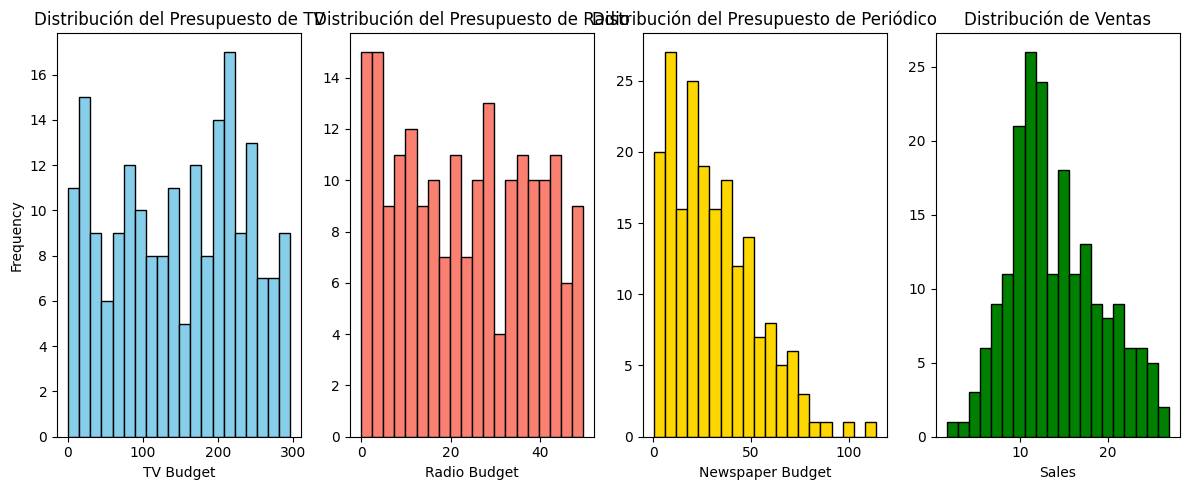

In [4]:
## 1.2 Visualizar las Distribuciones de los Datos

# Graficar la distribución de cada variable sin usar seaborn
plt.figure(figsize=(12, 5))

# Gráfico de distribución para TV
plt.subplot(1, 4, 1)
plt.hist(data['TV'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Presupuesto de TV')
plt.xlabel('TV Budget')
plt.ylabel('Frequency')

# Gráfico de distribución para Radio
plt.subplot(1, 4, 2)
plt.hist(data['radio'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución del Presupuesto de Radio')
plt.xlabel('Radio Budget')

# Gráfico de distribución para Newspaper
plt.subplot(1, 4, 3)
plt.hist(data['newspaper'], bins=20, color='gold', edgecolor='black')
plt.title('Distribución del Presupuesto de Periódico')
plt.xlabel('Newspaper Budget')

# Gráfico de distribución para Sales
plt.subplot(1, 4, 4)
plt.hist(data['sales'], bins=20, color='green', edgecolor='black')
plt.title('Distribución de Ventas')
plt.xlabel('Sales')

plt.tight_layout()
plt.show()

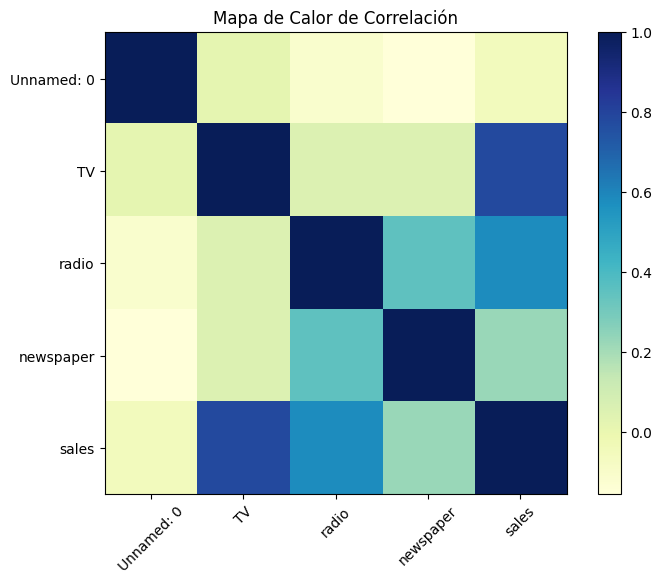

In [5]:
# 1.3 Graficar Relaciones de Pares y Mapa de Calor de Correlación

# Matriz de correlación
correlation_matrix = data.corr()

# Mapa de calor usando matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Mapa de Calor de Correlación")
plt.show()

In [6]:
# Crear una nueva característica que combine los presupuestos de TV y radio
data['tv_radio_interaction'] = data['TV'] * data['radio']

In [7]:
## 3.1 
#  Divide los datos en conjuntos de entrenamiento (90%) y de prueba (10%) para evaluar el rendimiento del modelo.

from sklearn.model_selection import train_test_split

# Definir las características y la variable objetivo
X = data[['TV', 'radio', 'newspaper', 'tv_radio_interaction']]
y = data['sales']

# Dividir los datos en 90% de entrenamiento y 10% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (180, 4)
Tamaño del conjunto de prueba: (20, 4)


In [8]:
# 3.2

##Seleccionar y cargar un algoritmo.
##Instanciar y entrenar el modelo en el conjunto de entrenamiento.
##Realizar predicciones en el conjunto de prueba.
##Evaluar el modelo utilizando tres métricas distintas.

# Importar las librerías necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Cargar el algoritmo y 2. Instanciar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 3. Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# 4. Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# 5. Evaluar el modelo utilizando tres métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente de Determinación (R²):", r2)

Evaluación del Modelo:
Error Cuadrático Medio (MSE): 0.3203175500000013
Error Absoluto Medio (MAE): 0.4270500000000026
Coeficiente de Determinación (R²): 0.9902489293968929


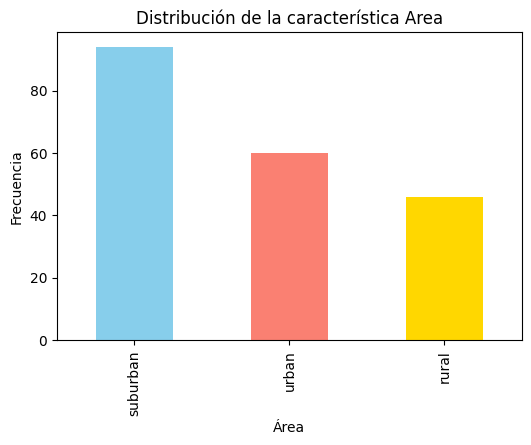

In [9]:
# 4.0

# Crear una columna 'Area' con valores aleatorios de acuerdo a una distribución gaussiana
np.random.seed(42)  # Para reproducibilidad
area_labels = ['rural', 'suburban', 'urban']
probabilities = [0.2, 0.5, 0.3]  # Proporciones aproximadas para una distribución gaussiana
data['Area'] = np.random.choice(area_labels, size=len(data), p=probabilities)

# Visualizar la distribución de 'Area'
plt.figure(figsize=(6, 4))
data['Area'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'gold'])
plt.title('Distribución de la característica Area')
plt.xlabel('Área')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
#Transformaremos Area en dos variables binarias, Area_suburban y Area_urban, según el esquema de codificación solicitado.

# Crear variables dummy
data['Area_suburban'] = np.where(data['Area'] == 'suburban', 1, 0)
data['Area_urban'] = np.where(data['Area'] == 'urban', 1, 0)

# Verificar la estructura de los datos
print(data[['Area', 'Area_suburban', 'Area_urban']].head())

       Area  Area_suburban  Area_urban
0  suburban              1           0
1     urban              0           1
2     urban              0           1
3  suburban              1           0
4     rural              0           0


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


# Dividir los datos en 90% entrenamiento y 10% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Instanciar y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Evaluación del Modelo con la nueva característica 'Area':")
print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente de Determinación (R²):", r2)

Evaluación del Modelo con la nueva característica 'Area':
Error Cuadrático Medio (MSE): 0.3203175500000013
Error Absoluto Medio (MAE): 0.4270500000000026
Coeficiente de Determinación (R²): 0.9902489293968929


# Preguntas

### ¿Existe una relación entre las ventas y los gastos en varios canales de publicidad?
Sí, hay una relación clara. Los análisis de correlación muestran que los gastos en publicidad en TV y radio están fuertemente correlacionados con las ventas, lo que significa que aumentos en estos presupuestos tienden a incrementar las ventas. La correlación del presupuesto en periódicos con las ventas es más débil.

### ¿Cuál es el canal que tiene una mayor relación con las ventas?
El canal de TV tiene la relación más fuerte con las ventas, con una correlación de 0.782. Esto sugiere que las inversiones en publicidad en TV tienen un impacto significativo en el aumento de las ventas.

### ¿Cuál es el modelo que describe ambos problemas?
El modelo de bosque aleatorio (Random Forest) fue utilizado para predecir las ventas en función de los presupuestos publicitarios. Este modelo mostró un rendimiento muy alto (R² de 0.982), lo cual es adecuado para predecir el impacto de los diferentes presupuestos en las ventas.

### ¿Cuál es el mejor canal para aumentar las ventas?
El canal de TV es el mejor para aumentar las ventas, dado que tiene la relación más alta con las ventas. Este canal debería ser priorizado para maximizar el retorno de inversión en publicidad.

### ¿Cuál es el peor canal para aumentar las ventas?
El periódico es el peor canal para aumentar las ventas, ya que tiene la correlación más baja con las ventas (0.228). Esto sugiere que las inversiones en publicidad en periódicos pueden no ser tan efectivas para impulsar las ventas en comparación con TV y radio.